# Demo 2 AI-prog

In [1]:
import sys
!{sys.executable} -m pip install --upgrade git+https://github.com/AndersBjelland/IT3105_Project2.git@dev

  Cloning https://github.com/AndersBjelland/IT3105_Project2.git (to revision dev) to /private/var/folders/dm/8497wlxs7d34zt6c6wdjfh500000gn/T/pip-req-build-s5cv9bca
  Created wheel for Project2: filename=Project2-1.0-py3-none-any.whl size=14953 sha256=5e13453c5dbe26f594f07e36df72b20b893ab32b59ca00c39c703285589132a0
  Stored in directory: /private/var/folders/dm/8497wlxs7d34zt6c6wdjfh500000gn/T/pip-ephem-wheel-cache-ppbz0ass/wheels/b2/24/99/8fa89aec957ae3920f431ef10ca7ed9e2e3743c4e806a2fbf0
Successfully built Project2
  Attempting uninstall: Project2
    Found existing installation: Project2 1.0
    Uninstalling Project2-1.0:
      Successfully uninstalled Project2-1.0


In [1]:
import matplotlib.pyplot as plt

In [2]:
# our code
from src import *

alpha zero ran 800 simulations in mcts

## Train a simple agent and show improvement

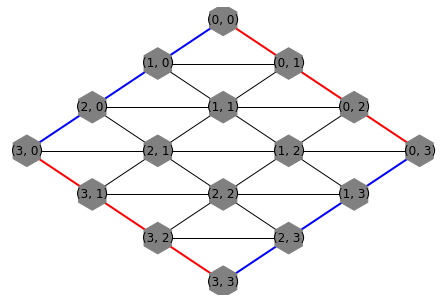

In [3]:
%matplotlib inline
hex = Hex((4,4))
hex.display_board()

In [25]:
hex = Hex((4,4))

encoder = DemoEncoder(padding=0)

actor = Actor(learning_rate=0.001,
             epsilon=0.25,
             end_epsilon=0.05,
             nn_shape=(32,128,16),
             filters=(),
             kernel_sizes=(),
                nn_opt='Adam',
              nn_activation='relu',
              nn_last_activation='softmax',
              nn_loss= 'categorical_crossentropy',
              encoder=encoder
             )
              
            
agent = Agent(actor)  
mcts = MCTS(agent.actor, hex)

In [28]:
agent.train_agent(hex, n_episodes=40, n_simulations=100, epochs=10, M=4, file_path='models/')

  0%|          | 0/40 [00:00<?, ?it/s]

Epoch 1/10
1/1 [==============================] - 1s 507ms/step - loss: 2.7885 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 2.7634 - accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 2.7394 - accuracy: 0.0909
Epoch 4/10
1/1 [==============================] - 0s 6ms/step - loss: 2.7162 - accuracy: 0.0909
Epoch 5/10
1/1 [==============================] - 0s 13ms/step - loss: 2.6936 - accuracy: 0.1818
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 2.6717 - accuracy: 0.2727
Epoch 7/10
1/1 [==============================] - 0s 4ms/step - loss: 2.6505 - accuracy: 0.2727
Epoch 8/10
1/1 [==============================] - 0s 9ms/step - loss: 2.6299 - accuracy: 0.3636
Epoch 9/10
1/1 [==============================] - 0s 8ms/step - loss: 2.6101 - accuracy: 0.3636
Epoch 10/10
1/1 [==============================] - 0s 7ms/step - loss: 2.5904 - accuracy: 0.3636


  2%|▎         | 1/40 [00:06<04:26,  6.83s/it]

Epoch 1/10
1/1 [==============================] - 0s 4ms/step - loss: 2.6607 - accuracy: 0.2000
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 2.6494 - accuracy: 0.2000
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 2.6378 - accuracy: 0.2000
Epoch 4/10
1/1 [==============================] - 0s 15ms/step - loss: 2.6260 - accuracy: 0.2000
Epoch 5/10
1/1 [==============================] - 0s 16ms/step - loss: 2.6140 - accuracy: 0.2000
Epoch 6/10
1/1 [==============================] - 0s 13ms/step - loss: 2.6022 - accuracy: 0.2000
Epoch 7/10
1/1 [==============================] - 0s 10ms/step - loss: 2.5903 - accuracy: 0.2000
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 2.5784 - accuracy: 0.2000
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 2.5665 - accuracy: 0.2000
Epoch 10/10
1/1 [==============================] - 0s 3ms/step - loss: 2.5546 - accuracy: 0.2000


  5%|▌         | 2/40 [00:13<04:18,  6.80s/it]

Epoch 1/10
1/1 [==============================] - 0s 3ms/step - loss: 2.6107 - accuracy: 0.1786
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 2.6022 - accuracy: 0.1786
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 2.5935 - accuracy: 0.2143
Epoch 4/10
1/1 [==============================] - 0s 14ms/step - loss: 2.5848 - accuracy: 0.2143
Epoch 5/10
1/1 [==============================] - 0s 13ms/step - loss: 2.5760 - accuracy: 0.2143
Epoch 6/10
1/1 [==============================] - 0s 13ms/step - loss: 2.5671 - accuracy: 0.2143
Epoch 7/10
1/1 [==============================] - 0s 8ms/step - loss: 2.5583 - accuracy: 0.1786
Epoch 8/10
1/1 [==============================] - 0s 7ms/step - loss: 2.5494 - accuracy: 0.1786
Epoch 9/10
1/1 [==============================] - 0s 9ms/step - loss: 2.5405 - accuracy: 0.1786
Epoch 10/10
1/1 [==============================] - 0s 6ms/step - loss: 2.5316 - accuracy: 0.2143


  8%|▊         | 3/40 [00:19<03:57,  6.43s/it]

Epoch 1/10
1/1 [==============================] - 0s 3ms/step - loss: 2.5852 - accuracy: 0.1714
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 2.5779 - accuracy: 0.1714
Epoch 3/10
1/1 [==============================] - 0s 9ms/step - loss: 2.5702 - accuracy: 0.1714
Epoch 4/10
1/1 [==============================] - 0s 11ms/step - loss: 2.5622 - accuracy: 0.1714
Epoch 5/10
1/1 [==============================] - 0s 13ms/step - loss: 2.5539 - accuracy: 0.1714
Epoch 6/10
1/1 [==============================] - 0s 9ms/step - loss: 2.5455 - accuracy: 0.1714
Epoch 7/10
1/1 [==============================] - 0s 7ms/step - loss: 2.5369 - accuracy: 0.1714
Epoch 8/10
1/1 [==============================] - 0s 7ms/step - loss: 2.5283 - accuracy: 0.1714
Epoch 9/10
1/1 [==============================] - 0s 3ms/step - loss: 2.5197 - accuracy: 0.1714
Epoch 10/10
1/1 [==============================] - 0s 3ms/step - loss: 2.5111 - accuracy: 0.1714


 10%|█         | 4/40 [00:24<03:38,  6.08s/it]

Epoch 1/10
1/1 [==============================] - 0s 3ms/step - loss: 2.5824 - accuracy: 0.1739
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 2.5762 - accuracy: 0.1957
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 2.5694 - accuracy: 0.1957
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 2.5623 - accuracy: 0.1957
Epoch 5/10
1/1 [==============================] - 0s 7ms/step - loss: 2.5548 - accuracy: 0.1957
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 2.5472 - accuracy: 0.1957
Epoch 7/10
1/1 [==============================] - 0s 7ms/step - loss: 2.5395 - accuracy: 0.1957
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 2.5317 - accuracy: 0.1957
Epoch 9/10
1/1 [==============================] - 0s 9ms/step - loss: 2.5239 - accuracy: 0.2174
Epoch 10/10
1/1 [==============================] - 0s 8ms/step - loss: 2.5161 - accuracy: 0.2174


 12%|█▎        | 5/40 [00:32<03:53,  6.67s/it]

Epoch 1/10
1/1 [==============================] - 0s 3ms/step - loss: 2.5736 - accuracy: 0.1897
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 2.5663 - accuracy: 0.1897
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 2.5584 - accuracy: 0.1897
Epoch 4/10
1/1 [==============================] - 0s 12ms/step - loss: 2.5500 - accuracy: 0.2069
Epoch 5/10
1/1 [==============================] - 0s 13ms/step - loss: 2.5413 - accuracy: 0.2069
Epoch 6/10
1/1 [==============================] - 0s 15ms/step - loss: 2.5326 - accuracy: 0.2069
Epoch 7/10
1/1 [==============================] - 0s 11ms/step - loss: 2.5240 - accuracy: 0.2069
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 2.5154 - accuracy: 0.2241
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 2.5070 - accuracy: 0.2414
Epoch 10/10
1/1 [==============================] - 0s 2ms/step - loss: 2.4988 - accuracy: 0.2586


 15%|█▌        | 6/40 [00:41<04:16,  7.53s/it]

Epoch 1/10
1/1 [==============================] - 0s 3ms/step - loss: 2.5241 - accuracy: 0.2308
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 2.5171 - accuracy: 0.2154
Epoch 3/10
1/1 [==============================] - 0s 3ms/step - loss: 2.5103 - accuracy: 0.2154
Epoch 4/10
1/1 [==============================] - 0s 4ms/step - loss: 2.5035 - accuracy: 0.2154
Epoch 5/10
1/1 [==============================] - 0s 15ms/step - loss: 2.4966 - accuracy: 0.2154
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 2.4898 - accuracy: 0.2154
Epoch 7/10
1/1 [==============================] - 0s 3ms/step - loss: 2.4829 - accuracy: 0.2154
Epoch 8/10
1/1 [==============================] - 0s 12ms/step - loss: 2.4760 - accuracy: 0.2154
Epoch 9/10
1/1 [==============================] - 0s 3ms/step - loss: 2.4690 - accuracy: 0.2462
Epoch 10/10
1/1 [==============================] - 0s 19ms/step - loss: 2.4621 - accuracy: 0.2462


 18%|█▊        | 7/40 [00:48<03:54,  7.10s/it]

Epoch 1/10
1/1 [==============================] - 0s 3ms/step - loss: 2.5140 - accuracy: 0.2179
Epoch 2/10
1/1 [==============================] - 0s 8ms/step - loss: 2.5067 - accuracy: 0.2179
Epoch 3/10
1/1 [==============================] - 0s 8ms/step - loss: 2.4985 - accuracy: 0.2179
Epoch 4/10
1/1 [==============================] - 0s 6ms/step - loss: 2.4900 - accuracy: 0.2308
Epoch 5/10
1/1 [==============================] - 0s 12ms/step - loss: 2.4815 - accuracy: 0.2308
Epoch 6/10
1/1 [==============================] - 0s 7ms/step - loss: 2.4732 - accuracy: 0.2436
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 2.4651 - accuracy: 0.2436
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 2.4574 - accuracy: 0.2436
Epoch 9/10
1/1 [==============================] - 0s 7ms/step - loss: 2.4500 - accuracy: 0.2692
Epoch 10/10
1/1 [==============================] - 0s 8ms/step - loss: 2.4429 - accuracy: 0.2692


 20%|██        | 8/40 [00:56<03:58,  7.45s/it]

Epoch 1/10
1/1 [==============================] - 0s 3ms/step - loss: 2.4648 - accuracy: 0.2471
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 2.4584 - accuracy: 0.2588
Epoch 3/10
1/1 [==============================] - 0s 2ms/step - loss: 2.4519 - accuracy: 0.2588
Epoch 4/10
1/1 [==============================] - 0s 3ms/step - loss: 2.4451 - accuracy: 0.2706
Epoch 5/10
1/1 [==============================] - 0s 3ms/step - loss: 2.4382 - accuracy: 0.2706
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 2.4310 - accuracy: 0.2941
Epoch 7/10
1/1 [==============================] - 0s 3ms/step - loss: 2.4238 - accuracy: 0.2824
Epoch 8/10
1/1 [==============================] - 0s 3ms/step - loss: 2.4165 - accuracy: 0.2706
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 2.4091 - accuracy: 0.2706
Epoch 10/10
1/1 [==============================] - 0s 3ms/step - loss: 2.4018 - accuracy: 0.2824


 22%|██▎       | 9/40 [01:05<04:10,  8.08s/it]

Epoch 1/10
1/1 [==============================] - 0s 3ms/step - loss: 2.4177 - accuracy: 0.2826
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 2.4112 - accuracy: 0.2826
Epoch 3/10
1/1 [==============================] - 0s 3ms/step - loss: 2.4048 - accuracy: 0.2826
Epoch 4/10
1/1 [==============================] - 0s 3ms/step - loss: 2.3984 - accuracy: 0.2935
Epoch 5/10
1/1 [==============================] - 0s 3ms/step - loss: 2.3922 - accuracy: 0.3043
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 2.3860 - accuracy: 0.3152
Epoch 7/10
1/1 [==============================] - 0s 3ms/step - loss: 2.3798 - accuracy: 0.3043
Epoch 8/10
1/1 [==============================] - 0s 3ms/step - loss: 2.3737 - accuracy: 0.3043
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 2.3676 - accuracy: 0.3043
Epoch 10/10
1/1 [==============================] - 0s 2ms/step - loss: 2.3616 - accuracy: 0.3043


 25%|██▌       | 10/40 [01:12<03:50,  7.70s/it]

Epoch 1/10
1/1 [==============================] - 0s 3ms/step - loss: 2.3835 - accuracy: 0.2900
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 2.3775 - accuracy: 0.2900
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 2.3713 - accuracy: 0.3000
Epoch 4/10
1/1 [==============================] - 0s 3ms/step - loss: 2.3651 - accuracy: 0.3200
Epoch 5/10
1/1 [==============================] - 0s 3ms/step - loss: 2.3590 - accuracy: 0.3200
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 2.3530 - accuracy: 0.3200
Epoch 7/10
1/1 [==============================] - 0s 3ms/step - loss: 2.3470 - accuracy: 0.3300
Epoch 8/10
1/1 [==============================] - 0s 4ms/step - loss: 2.3412 - accuracy: 0.3300
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 2.3354 - accuracy: 0.3300
Epoch 10/10
1/1 [==============================] - 0s 3ms/step - loss: 2.3296 - accuracy: 0.3200


 28%|██▊       | 11/40 [01:20<03:43,  7.72s/it]

Epoch 1/10
1/1 [==============================] - 0s 3ms/step - loss: 2.3457 - accuracy: 0.3364
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 2.3402 - accuracy: 0.3458
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 2.3346 - accuracy: 0.3551
Epoch 4/10
1/1 [==============================] - 0s 2ms/step - loss: 2.3291 - accuracy: 0.3551
Epoch 5/10
1/1 [==============================] - 0s 3ms/step - loss: 2.3235 - accuracy: 0.3551
Epoch 6/10
1/1 [==============================] - 0s 4ms/step - loss: 2.3180 - accuracy: 0.3645
Epoch 7/10
1/1 [==============================] - 0s 4ms/step - loss: 2.3127 - accuracy: 0.3551
Epoch 8/10
1/1 [==============================] - 0s 3ms/step - loss: 2.3075 - accuracy: 0.3645
Epoch 9/10
1/1 [==============================] - 0s 3ms/step - loss: 2.3023 - accuracy: 0.3551
Epoch 10/10
1/1 [==============================] - 0s 3ms/step - loss: 2.2972 - accuracy: 0.3551


 30%|███       | 12/40 [01:26<03:25,  7.36s/it]

Epoch 1/10
1/1 [==============================] - 0s 5ms/step - loss: 2.3312 - accuracy: 0.3390
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 2.3260 - accuracy: 0.3390
Epoch 3/10
1/1 [==============================] - 0s 13ms/step - loss: 2.3205 - accuracy: 0.3475
Epoch 4/10
1/1 [==============================] - 0s 6ms/step - loss: 2.3147 - accuracy: 0.3559
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 2.3089 - accuracy: 0.3559
Epoch 6/10
1/1 [==============================] - 0s 4ms/step - loss: 2.3033 - accuracy: 0.3644
Epoch 7/10
1/1 [==============================] - 0s 3ms/step - loss: 2.2978 - accuracy: 0.3644
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 2.2924 - accuracy: 0.3644
Epoch 9/10
1/1 [==============================] - 0s 3ms/step - loss: 2.2872 - accuracy: 0.3644
Epoch 10/10
1/1 [==============================] - 0s 5ms/step - loss: 2.2820 - accuracy: 0.3729


 32%|███▎      | 13/40 [01:35<03:31,  7.82s/it]

Epoch 1/10
1/1 [==============================] - 0s 3ms/step - loss: 2.3068 - accuracy: 0.3730
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 2.3020 - accuracy: 0.3730
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 2.2970 - accuracy: 0.3730
Epoch 4/10
1/1 [==============================] - 0s 3ms/step - loss: 2.2920 - accuracy: 0.3730
Epoch 5/10
1/1 [==============================] - 0s 7ms/step - loss: 2.2870 - accuracy: 0.3730
Epoch 6/10
1/1 [==============================] - 0s 6ms/step - loss: 2.2820 - accuracy: 0.3889
Epoch 7/10
1/1 [==============================] - 0s 9ms/step - loss: 2.2772 - accuracy: 0.3968
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 2.2725 - accuracy: 0.3968
Epoch 9/10
1/1 [==============================] - 0s 7ms/step - loss: 2.2680 - accuracy: 0.4127
Epoch 10/10
1/1 [==============================] - 0s 7ms/step - loss: 2.2634 - accuracy: 0.4127


 35%|███▌      | 14/40 [01:44<03:29,  8.07s/it]

Epoch 1/10
2/2 [==============================] - 0s 3ms/step - loss: 2.2955 - accuracy: 0.3910
Epoch 2/10
2/2 [==============================] - 0s 4ms/step - loss: 2.2875 - accuracy: 0.3910
Epoch 3/10
2/2 [==============================] - 0s 7ms/step - loss: 2.2851 - accuracy: 0.3835
Epoch 4/10
2/2 [==============================] - 0s 7ms/step - loss: 2.2835 - accuracy: 0.3835
Epoch 5/10
2/2 [==============================] - 0s 4ms/step - loss: 2.2818 - accuracy: 0.4286
Epoch 6/10
2/2 [==============================] - 0s 4ms/step - loss: 2.2796 - accuracy: 0.4436
Epoch 7/10
2/2 [==============================] - 0s 10ms/step - loss: 2.2767 - accuracy: 0.4211
Epoch 8/10
2/2 [==============================] - 0s 5ms/step - loss: 2.2731 - accuracy: 0.4286
Epoch 9/10
2/2 [==============================] - 0s 6ms/step - loss: 2.2689 - accuracy: 0.4286
Epoch 10/10
2/2 [==============================] - 0s 3ms/step - loss: 2.2648 - accuracy: 0.4060


 38%|███▊      | 15/40 [01:50<03:05,  7.41s/it]

Epoch 1/10
2/2 [==============================] - 0s 3ms/step - loss: 2.2886 - accuracy: 0.3706
Epoch 2/10
2/2 [==============================] - 0s 8ms/step - loss: 2.2837 - accuracy: 0.3706
Epoch 3/10
2/2 [==============================] - 0s 9ms/step - loss: 2.2791 - accuracy: 0.3706
Epoch 4/10
2/2 [==============================] - 0s 6ms/step - loss: 2.2736 - accuracy: 0.3706
Epoch 5/10
2/2 [==============================] - 0s 5ms/step - loss: 2.2693 - accuracy: 0.3706
Epoch 6/10
2/2 [==============================] - 0s 3ms/step - loss: 2.2653 - accuracy: 0.3636
Epoch 7/10
2/2 [==============================] - 0s 4ms/step - loss: 2.2606 - accuracy: 0.3706
Epoch 8/10
2/2 [==============================] - 0s 3ms/step - loss: 2.2555 - accuracy: 0.3776
Epoch 9/10
2/2 [==============================] - 0s 8ms/step - loss: 2.2495 - accuracy: 0.4126
Epoch 10/10
2/2 [==============================] - 0s 3ms/step - loss: 2.2452 - accuracy: 0.4126


 40%|████      | 16/40 [01:58<03:03,  7.63s/it]

Epoch 1/10
2/2 [==============================] - 0s 2ms/step - loss: 2.2570 - accuracy: 0.4267
Epoch 2/10
2/2 [==============================] - 0s 5ms/step - loss: 2.2537 - accuracy: 0.4267
Epoch 3/10
2/2 [==============================] - 0s 11ms/step - loss: 2.2501 - accuracy: 0.4333
Epoch 4/10
2/2 [==============================] - 0s 7ms/step - loss: 2.2459 - accuracy: 0.4267
Epoch 5/10
2/2 [==============================] - 0s 7ms/step - loss: 2.2414 - accuracy: 0.4267
Epoch 6/10
2/2 [==============================] - 0s 4ms/step - loss: 2.2365 - accuracy: 0.4267
Epoch 7/10
2/2 [==============================] - 0s 5ms/step - loss: 2.2314 - accuracy: 0.4400
Epoch 8/10
2/2 [==============================] - 0s 8ms/step - loss: 2.2275 - accuracy: 0.4533
Epoch 9/10
2/2 [==============================] - 0s 5ms/step - loss: 2.2233 - accuracy: 0.4667
Epoch 10/10
2/2 [==============================] - 0s 5ms/step - loss: 2.2196 - accuracy: 0.4800


 42%|████▎     | 17/40 [02:04<02:40,  6.99s/it]

Epoch 1/10
2/2 [==============================] - 0s 3ms/step - loss: 2.2472 - accuracy: 0.4403
Epoch 2/10
2/2 [==============================] - 0s 4ms/step - loss: 2.2434 - accuracy: 0.4403
Epoch 3/10
2/2 [==============================] - 0s 10ms/step - loss: 2.2389 - accuracy: 0.4340
Epoch 4/10
2/2 [==============================] - 0s 11ms/step - loss: 2.2338 - accuracy: 0.4340
Epoch 5/10
2/2 [==============================] - 0s 4ms/step - loss: 2.2291 - accuracy: 0.4528
Epoch 6/10
2/2 [==============================] - 0s 4ms/step - loss: 2.2249 - accuracy: 0.4528
Epoch 7/10
2/2 [==============================] - 0s 10ms/step - loss: 2.2212 - accuracy: 0.4654
Epoch 8/10
2/2 [==============================] - 0s 9ms/step - loss: 2.2173 - accuracy: 0.4654
Epoch 9/10
2/2 [==============================] - 0s 10ms/step - loss: 2.2134 - accuracy: 0.4717
Epoch 10/10
2/2 [==============================] - 0s 9ms/step - loss: 2.2081 - accuracy: 0.4654


 45%|████▌     | 18/40 [02:10<02:28,  6.77s/it]

Epoch 1/10
2/2 [==============================] - 0s 2ms/step - loss: 2.2376 - accuracy: 0.4431
Epoch 2/10
2/2 [==============================] - 0s 4ms/step - loss: 2.2332 - accuracy: 0.4371
Epoch 3/10
2/2 [==============================] - 0s 9ms/step - loss: 2.2296 - accuracy: 0.4431
Epoch 4/10
2/2 [==============================] - 0s 5ms/step - loss: 2.2254 - accuracy: 0.4491
Epoch 5/10
2/2 [==============================] - 0s 3ms/step - loss: 2.2211 - accuracy: 0.4671
Epoch 6/10
2/2 [==============================] - 0s 5ms/step - loss: 2.2171 - accuracy: 0.4731
Epoch 7/10
2/2 [==============================] - 0s 8ms/step - loss: 2.2135 - accuracy: 0.4671
Epoch 8/10
2/2 [==============================] - 0s 8ms/step - loss: 2.2101 - accuracy: 0.4731
Epoch 9/10
2/2 [==============================] - 0s 5ms/step - loss: 2.2064 - accuracy: 0.4790
Epoch 10/10
2/2 [==============================] - 0s 7ms/step - loss: 2.2029 - accuracy: 0.4850


 48%|████▊     | 19/40 [02:16<02:18,  6.59s/it]

Epoch 1/10
2/2 [==============================] - 0s 8ms/step - loss: 2.2291 - accuracy: 0.4886
Epoch 2/10
2/2 [==============================] - 0s 13ms/step - loss: 2.2249 - accuracy: 0.4830
Epoch 3/10
2/2 [==============================] - 0s 9ms/step - loss: 2.2210 - accuracy: 0.4830
Epoch 4/10
2/2 [==============================] - 0s 4ms/step - loss: 2.2173 - accuracy: 0.4830
Epoch 5/10
2/2 [==============================] - 0s 2ms/step - loss: 2.2130 - accuracy: 0.4943
Epoch 6/10
2/2 [==============================] - 0s 3ms/step - loss: 2.2096 - accuracy: 0.5000
Epoch 7/10
2/2 [==============================] - 0s 4ms/step - loss: 2.2057 - accuracy: 0.5057
Epoch 8/10
2/2 [==============================] - 0s 4ms/step - loss: 2.2023 - accuracy: 0.4943
Epoch 9/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1984 - accuracy: 0.4886
Epoch 10/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1951 - accuracy: 0.4830


 50%|█████     | 20/40 [02:22<02:07,  6.39s/it]

Epoch 1/10
2/2 [==============================] - 0s 2ms/step - loss: 2.2259 - accuracy: 0.4706
Epoch 2/10
2/2 [==============================] - 0s 4ms/step - loss: 2.2221 - accuracy: 0.4706
Epoch 3/10
2/2 [==============================] - 0s 7ms/step - loss: 2.2175 - accuracy: 0.4866
Epoch 4/10
2/2 [==============================] - 0s 8ms/step - loss: 2.2129 - accuracy: 0.4920
Epoch 5/10
2/2 [==============================] - 0s 10ms/step - loss: 2.2090 - accuracy: 0.4920
Epoch 6/10
2/2 [==============================] - 0s 6ms/step - loss: 2.2056 - accuracy: 0.4866
Epoch 7/10
2/2 [==============================] - 0s 3ms/step - loss: 2.2012 - accuracy: 0.4920
Epoch 8/10
2/2 [==============================] - 0s 2ms/step - loss: 2.1969 - accuracy: 0.4973
Epoch 9/10
2/2 [==============================] - 0s 5ms/step - loss: 2.1930 - accuracy: 0.4973
Epoch 10/10
2/2 [==============================] - 0s 5ms/step - loss: 2.1899 - accuracy: 0.5080


 52%|█████▎    | 21/40 [02:29<02:03,  6.51s/it]

Epoch 1/10
2/2 [==============================] - 0s 3ms/step - loss: 2.2051 - accuracy: 0.4924
Epoch 2/10
2/2 [==============================] - 0s 4ms/step - loss: 2.2016 - accuracy: 0.4975
Epoch 3/10
2/2 [==============================] - 0s 6ms/step - loss: 2.1971 - accuracy: 0.4924
Epoch 4/10
2/2 [==============================] - 0s 5ms/step - loss: 2.1929 - accuracy: 0.5025
Epoch 5/10
2/2 [==============================] - 0s 7ms/step - loss: 2.1891 - accuracy: 0.5127
Epoch 6/10
2/2 [==============================] - 0s 7ms/step - loss: 2.1857 - accuracy: 0.5178
Epoch 7/10
2/2 [==============================] - 0s 5ms/step - loss: 2.1822 - accuracy: 0.5127
Epoch 8/10
2/2 [==============================] - 0s 4ms/step - loss: 2.1792 - accuracy: 0.5178
Epoch 9/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1757 - accuracy: 0.5330
Epoch 10/10
2/2 [==============================] - 0s 8ms/step - loss: 2.1723 - accuracy: 0.5279


 55%|█████▌    | 22/40 [02:35<01:57,  6.56s/it]

Epoch 1/10
2/2 [==============================] - 0s 9ms/step - loss: 2.1860 - accuracy: 0.5171
Epoch 2/10
2/2 [==============================] - 0s 8ms/step - loss: 2.1833 - accuracy: 0.5122
Epoch 3/10
2/2 [==============================] - 0s 8ms/step - loss: 2.1805 - accuracy: 0.5220
Epoch 4/10
2/2 [==============================] - 0s 12ms/step - loss: 2.1777 - accuracy: 0.5220
Epoch 5/10
2/2 [==============================] - 0s 6ms/step - loss: 2.1754 - accuracy: 0.5220
Epoch 6/10
2/2 [==============================] - 0s 7ms/step - loss: 2.1726 - accuracy: 0.5171
Epoch 7/10
2/2 [==============================] - 0s 6ms/step - loss: 2.1700 - accuracy: 0.5171
Epoch 8/10
2/2 [==============================] - 0s 9ms/step - loss: 2.1674 - accuracy: 0.5268
Epoch 9/10
2/2 [==============================] - 0s 11ms/step - loss: 2.1653 - accuracy: 0.5317
Epoch 10/10
2/2 [==============================] - 0s 7ms/step - loss: 2.1631 - accuracy: 0.5415


 57%|█████▊    | 23/40 [02:42<01:49,  6.45s/it]

Epoch 1/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1783 - accuracy: 0.5330
Epoch 2/10
2/2 [==============================] - 0s 5ms/step - loss: 2.1759 - accuracy: 0.5377
Epoch 3/10
2/2 [==============================] - 0s 9ms/step - loss: 2.1733 - accuracy: 0.5283
Epoch 4/10
2/2 [==============================] - 0s 4ms/step - loss: 2.1708 - accuracy: 0.5189
Epoch 5/10
2/2 [==============================] - 0s 8ms/step - loss: 2.1686 - accuracy: 0.5236
Epoch 6/10
2/2 [==============================] - 0s 6ms/step - loss: 2.1664 - accuracy: 0.5189
Epoch 7/10
2/2 [==============================] - 0s 4ms/step - loss: 2.1643 - accuracy: 0.5236
Epoch 8/10
2/2 [==============================] - 0s 6ms/step - loss: 2.1621 - accuracy: 0.5283
Epoch 9/10
2/2 [==============================] - 0s 6ms/step - loss: 2.1599 - accuracy: 0.5472
Epoch 10/10
2/2 [==============================] - 0s 4ms/step - loss: 2.1577 - accuracy: 0.5472


 60%|██████    | 24/40 [02:48<01:41,  6.35s/it]

Epoch 1/10
2/2 [==============================] - 0s 2ms/step - loss: 2.1766 - accuracy: 0.5318
Epoch 2/10
2/2 [==============================] - 0s 9ms/step - loss: 2.1745 - accuracy: 0.5273
Epoch 3/10
2/2 [==============================] - 0s 7ms/step - loss: 2.1721 - accuracy: 0.5273
Epoch 4/10
2/2 [==============================] - 0s 5ms/step - loss: 2.1698 - accuracy: 0.5318
Epoch 5/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1675 - accuracy: 0.5227
Epoch 6/10
2/2 [==============================] - 0s 7ms/step - loss: 2.1656 - accuracy: 0.5227
Epoch 7/10
2/2 [==============================] - 0s 6ms/step - loss: 2.1631 - accuracy: 0.5318
Epoch 8/10
2/2 [==============================] - 0s 10ms/step - loss: 2.1610 - accuracy: 0.5364
Epoch 9/10
2/2 [==============================] - 0s 8ms/step - loss: 2.1589 - accuracy: 0.5318
Epoch 10/10
2/2 [==============================] - 0s 6ms/step - loss: 2.1569 - accuracy: 0.5273


 62%|██████▎   | 25/40 [02:54<01:33,  6.22s/it]

Epoch 1/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1723 - accuracy: 0.5284
Epoch 2/10
2/2 [==============================] - 0s 4ms/step - loss: 2.1695 - accuracy: 0.5371
Epoch 3/10
2/2 [==============================] - 0s 9ms/step - loss: 2.1670 - accuracy: 0.5415
Epoch 4/10
2/2 [==============================] - 0s 4ms/step - loss: 2.1646 - accuracy: 0.5502
Epoch 5/10
2/2 [==============================] - 0s 4ms/step - loss: 2.1625 - accuracy: 0.5459
Epoch 6/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1602 - accuracy: 0.5459
Epoch 7/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1581 - accuracy: 0.5459
Epoch 8/10
2/2 [==============================] - 0s 7ms/step - loss: 2.1554 - accuracy: 0.5502
Epoch 9/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1535 - accuracy: 0.5546
Epoch 10/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1516 - accuracy: 0.5546


 65%|██████▌   | 26/40 [03:00<01:27,  6.22s/it]

Epoch 1/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1742 - accuracy: 0.5333
Epoch 2/10
2/2 [==============================] - 0s 4ms/step - loss: 2.1717 - accuracy: 0.5333
Epoch 3/10
2/2 [==============================] - 0s 12ms/step - loss: 2.1688 - accuracy: 0.5333
Epoch 4/10
2/2 [==============================] - 0s 11ms/step - loss: 2.1660 - accuracy: 0.5375
Epoch 5/10
2/2 [==============================] - 0s 8ms/step - loss: 2.1640 - accuracy: 0.5292
Epoch 6/10
2/2 [==============================] - 0s 6ms/step - loss: 2.1612 - accuracy: 0.5292
Epoch 7/10
2/2 [==============================] - 0s 6ms/step - loss: 2.1582 - accuracy: 0.5292
Epoch 8/10
2/2 [==============================] - 0s 4ms/step - loss: 2.1555 - accuracy: 0.5250
Epoch 9/10
2/2 [==============================] - 0s 4ms/step - loss: 2.1529 - accuracy: 0.5292
Epoch 10/10
2/2 [==============================] - 0s 4ms/step - loss: 2.1507 - accuracy: 0.5292


 68%|██████▊   | 27/40 [03:06<01:22,  6.35s/it]

Epoch 1/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1641 - accuracy: 0.5181
Epoch 2/10
2/2 [==============================] - 0s 4ms/step - loss: 2.1615 - accuracy: 0.5261
Epoch 3/10
2/2 [==============================] - 0s 7ms/step - loss: 2.1592 - accuracy: 0.5261
Epoch 4/10
2/2 [==============================] - 0s 7ms/step - loss: 2.1568 - accuracy: 0.5261
Epoch 5/10
2/2 [==============================] - 0s 6ms/step - loss: 2.1544 - accuracy: 0.5221
Epoch 6/10
2/2 [==============================] - 0s 6ms/step - loss: 2.1520 - accuracy: 0.5261
Epoch 7/10
2/2 [==============================] - 0s 7ms/step - loss: 2.1497 - accuracy: 0.5301
Epoch 8/10
2/2 [==============================] - 0s 7ms/step - loss: 2.1472 - accuracy: 0.5341
Epoch 9/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1451 - accuracy: 0.5341
Epoch 10/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1428 - accuracy: 0.5382


 70%|███████   | 28/40 [03:11<01:11,  5.94s/it]

Epoch 1/10
3/3 [==============================] - 0s 25ms/step - loss: 2.1555 - accuracy: 0.5331
Epoch 2/10
3/3 [==============================] - 0s 4ms/step - loss: 2.1568 - accuracy: 0.5253
Epoch 3/10
3/3 [==============================] - 0s 6ms/step - loss: 2.1801 - accuracy: 0.4864
Epoch 4/10
3/3 [==============================] - 0s 4ms/step - loss: 2.1978 - accuracy: 0.4825
Epoch 5/10
3/3 [==============================] - 0s 4ms/step - loss: 2.1954 - accuracy: 0.4708
Epoch 6/10
3/3 [==============================] - 0s 3ms/step - loss: 2.1998 - accuracy: 0.4475
Epoch 7/10
3/3 [==============================] - 0s 7ms/step - loss: 2.1851 - accuracy: 0.4553
Epoch 8/10
3/3 [==============================] - 0s 4ms/step - loss: 2.1879 - accuracy: 0.4630
Epoch 9/10
3/3 [==============================] - 0s 3ms/step - loss: 2.1973 - accuracy: 0.4747
Epoch 10/10
3/3 [==============================] - 0s 3ms/step - loss: 2.2054 - accuracy: 0.4864


 72%|███████▎  | 29/40 [03:18<01:07,  6.14s/it]

Epoch 1/10
3/3 [==============================] - 0s 2ms/step - loss: 2.2403 - accuracy: 0.4667
Epoch 2/10
3/3 [==============================] - 0s 4ms/step - loss: 2.2340 - accuracy: 0.4593
Epoch 3/10
3/3 [==============================] - 0s 9ms/step - loss: 2.2272 - accuracy: 0.4519
Epoch 4/10
3/3 [==============================] - 0s 4ms/step - loss: 2.2166 - accuracy: 0.4593
Epoch 5/10
3/3 [==============================] - 0s 3ms/step - loss: 2.2058 - accuracy: 0.4519
Epoch 6/10
3/3 [==============================] - 0s 4ms/step - loss: 2.1987 - accuracy: 0.4741
Epoch 7/10
3/3 [==============================] - 0s 4ms/step - loss: 2.1909 - accuracy: 0.4667
Epoch 8/10
3/3 [==============================] - 0s 4ms/step - loss: 2.1842 - accuracy: 0.4741
Epoch 9/10
3/3 [==============================] - 0s 4ms/step - loss: 2.1798 - accuracy: 0.4741
Epoch 10/10
3/3 [==============================] - 0s 4ms/step - loss: 2.1751 - accuracy: 0.4852


 75%|███████▌  | 30/40 [03:25<01:03,  6.31s/it]

Epoch 1/10
3/3 [==============================] - 0s 3ms/step - loss: 2.1809 - accuracy: 0.4729
Epoch 2/10
3/3 [==============================] - 0s 6ms/step - loss: 2.1734 - accuracy: 0.4765
Epoch 3/10
3/3 [==============================] - 0s 7ms/step - loss: 2.1673 - accuracy: 0.4801
Epoch 4/10
3/3 [==============================] - 0s 7ms/step - loss: 2.1646 - accuracy: 0.4910
Epoch 5/10
3/3 [==============================] - 0s 5ms/step - loss: 2.1624 - accuracy: 0.4910
Epoch 6/10
3/3 [==============================] - 0s 5ms/step - loss: 2.1593 - accuracy: 0.4910
Epoch 7/10
3/3 [==============================] - 0s 4ms/step - loss: 2.1568 - accuracy: 0.4946
Epoch 8/10
3/3 [==============================] - 0s 4ms/step - loss: 2.1552 - accuracy: 0.5018
Epoch 9/10
3/3 [==============================] - 0s 3ms/step - loss: 2.1522 - accuracy: 0.5018
Epoch 10/10
3/3 [==============================] - 0s 3ms/step - loss: 2.1486 - accuracy: 0.5054


 78%|███████▊  | 31/40 [03:30<00:53,  5.93s/it]

Epoch 1/10
3/3 [==============================] - 0s 3ms/step - loss: 2.1631 - accuracy: 0.4912
Epoch 2/10
3/3 [==============================] - 0s 4ms/step - loss: 2.1608 - accuracy: 0.5053
Epoch 3/10
3/3 [==============================] - 0s 6ms/step - loss: 2.1583 - accuracy: 0.4877
Epoch 4/10
3/3 [==============================] - 0s 6ms/step - loss: 2.1561 - accuracy: 0.4947
Epoch 5/10
3/3 [==============================] - 0s 3ms/step - loss: 2.1535 - accuracy: 0.4982
Epoch 6/10
3/3 [==============================] - 0s 3ms/step - loss: 2.1515 - accuracy: 0.5088
Epoch 7/10
3/3 [==============================] - 0s 2ms/step - loss: 2.1494 - accuracy: 0.5193
Epoch 8/10
3/3 [==============================] - 0s 4ms/step - loss: 2.1468 - accuracy: 0.5228
Epoch 9/10
3/3 [==============================] - 0s 2ms/step - loss: 2.1448 - accuracy: 0.5193
Epoch 10/10
3/3 [==============================] - 0s 2ms/step - loss: 2.1434 - accuracy: 0.5263


 80%|████████  | 32/40 [03:35<00:46,  5.77s/it]

Epoch 1/10
3/3 [==============================] - 0s 2ms/step - loss: 2.1550 - accuracy: 0.5240
Epoch 2/10
3/3 [==============================] - 0s 5ms/step - loss: 2.1529 - accuracy: 0.5205
Epoch 3/10
3/3 [==============================] - 0s 5ms/step - loss: 2.1505 - accuracy: 0.5240
Epoch 4/10
3/3 [==============================] - 0s 3ms/step - loss: 2.1482 - accuracy: 0.5205
Epoch 5/10
3/3 [==============================] - 0s 3ms/step - loss: 2.1466 - accuracy: 0.5171
Epoch 6/10
3/3 [==============================] - 0s 6ms/step - loss: 2.1448 - accuracy: 0.5137
Epoch 7/10
3/3 [==============================] - 0s 4ms/step - loss: 2.1429 - accuracy: 0.5171
Epoch 8/10
3/3 [==============================] - 0s 3ms/step - loss: 2.1415 - accuracy: 0.5171
Epoch 9/10
3/3 [==============================] - 0s 3ms/step - loss: 2.1395 - accuracy: 0.5171
Epoch 10/10
3/3 [==============================] - 0s 4ms/step - loss: 2.1376 - accuracy: 0.5240


 82%|████████▎ | 33/40 [03:40<00:38,  5.48s/it]

Epoch 1/10
3/3 [==============================] - 0s 2ms/step - loss: 2.1535 - accuracy: 0.5166
Epoch 2/10
3/3 [==============================] - 0s 3ms/step - loss: 2.1522 - accuracy: 0.5166
Epoch 3/10
3/3 [==============================] - 0s 7ms/step - loss: 2.1498 - accuracy: 0.5265
Epoch 4/10
3/3 [==============================] - 0s 6ms/step - loss: 2.1477 - accuracy: 0.5298
Epoch 5/10
3/3 [==============================] - 0s 5ms/step - loss: 2.1461 - accuracy: 0.5364
Epoch 6/10
3/3 [==============================] - 0s 4ms/step - loss: 2.1440 - accuracy: 0.5298
Epoch 7/10
3/3 [==============================] - 0s 5ms/step - loss: 2.1417 - accuracy: 0.5331
Epoch 8/10
3/3 [==============================] - 0s 4ms/step - loss: 2.1400 - accuracy: 0.5364
Epoch 9/10
3/3 [==============================] - 0s 3ms/step - loss: 2.1384 - accuracy: 0.5397
Epoch 10/10
3/3 [==============================] - 0s 3ms/step - loss: 2.1368 - accuracy: 0.5497


 85%|████████▌ | 34/40 [03:47<00:34,  5.81s/it]

Epoch 1/10
3/3 [==============================] - 0s 2ms/step - loss: 2.1481 - accuracy: 0.5335
Epoch 2/10
3/3 [==============================] - 0s 3ms/step - loss: 2.1461 - accuracy: 0.5399
Epoch 3/10
3/3 [==============================] - 0s 7ms/step - loss: 2.1442 - accuracy: 0.5367
Epoch 4/10
3/3 [==============================] - 0s 8ms/step - loss: 2.1424 - accuracy: 0.5335
Epoch 5/10
3/3 [==============================] - 0s 7ms/step - loss: 2.1407 - accuracy: 0.5304
Epoch 6/10
3/3 [==============================] - 0s 2ms/step - loss: 2.1390 - accuracy: 0.5208
Epoch 7/10
3/3 [==============================] - 0s 2ms/step - loss: 2.1374 - accuracy: 0.5335
Epoch 8/10
3/3 [==============================] - 0s 3ms/step - loss: 2.1356 - accuracy: 0.5304
Epoch 9/10
3/3 [==============================] - 0s 2ms/step - loss: 2.1339 - accuracy: 0.5399
Epoch 10/10
3/3 [==============================] - 0s 2ms/step - loss: 2.1327 - accuracy: 0.5367


 88%|████████▊ | 35/40 [03:53<00:29,  5.99s/it]

Epoch 1/10
3/3 [==============================] - 0s 3ms/step - loss: 2.1425 - accuracy: 0.5280
Epoch 2/10
3/3 [==============================] - 0s 3ms/step - loss: 2.1408 - accuracy: 0.5248
Epoch 3/10
3/3 [==============================] - 0s 3ms/step - loss: 2.1395 - accuracy: 0.5280
Epoch 4/10
3/3 [==============================] - 0s 6ms/step - loss: 2.1378 - accuracy: 0.5342
Epoch 5/10
3/3 [==============================] - 0s 2ms/step - loss: 2.1363 - accuracy: 0.5404
Epoch 6/10
3/3 [==============================] - 0s 5ms/step - loss: 2.1351 - accuracy: 0.5404
Epoch 7/10
3/3 [==============================] - 0s 4ms/step - loss: 2.1337 - accuracy: 0.5373
Epoch 8/10
3/3 [==============================] - 0s 4ms/step - loss: 2.1323 - accuracy: 0.5373
Epoch 9/10
3/3 [==============================] - 0s 3ms/step - loss: 2.1308 - accuracy: 0.5373
Epoch 10/10
3/3 [==============================] - 0s 3ms/step - loss: 2.1297 - accuracy: 0.5466


 90%|█████████ | 36/40 [04:00<00:25,  6.37s/it]

Epoch 1/10
3/3 [==============================] - 0s 3ms/step - loss: 2.1387 - accuracy: 0.5319
Epoch 2/10
3/3 [==============================] - 0s 3ms/step - loss: 2.1375 - accuracy: 0.5198
Epoch 3/10
3/3 [==============================] - 0s 10ms/step - loss: 2.1361 - accuracy: 0.5258
Epoch 4/10
3/3 [==============================] - 0s 6ms/step - loss: 2.1349 - accuracy: 0.5289
Epoch 5/10
3/3 [==============================] - 0s 4ms/step - loss: 2.1338 - accuracy: 0.5380
Epoch 6/10
3/3 [==============================] - 0s 6ms/step - loss: 2.1329 - accuracy: 0.5410
Epoch 7/10
3/3 [==============================] - 0s 3ms/step - loss: 2.1318 - accuracy: 0.5471
Epoch 8/10
3/3 [==============================] - 0s 2ms/step - loss: 2.1305 - accuracy: 0.5441
Epoch 9/10
3/3 [==============================] - 0s 2ms/step - loss: 2.1294 - accuracy: 0.5410
Epoch 10/10
3/3 [==============================] - 0s 3ms/step - loss: 2.1285 - accuracy: 0.5410


 92%|█████████▎| 37/40 [04:06<00:18,  6.27s/it]

Epoch 1/10
3/3 [==============================] - 0s 3ms/step - loss: 2.1392 - accuracy: 0.5252
Epoch 2/10
3/3 [==============================] - 0s 4ms/step - loss: 2.1380 - accuracy: 0.5312
Epoch 3/10
3/3 [==============================] - 0s 4ms/step - loss: 2.1367 - accuracy: 0.5312
Epoch 4/10
3/3 [==============================] - 0s 6ms/step - loss: 2.1357 - accuracy: 0.5282
Epoch 5/10
3/3 [==============================] - 0s 4ms/step - loss: 2.1341 - accuracy: 0.5312
Epoch 6/10
3/3 [==============================] - 0s 3ms/step - loss: 2.1330 - accuracy: 0.5401
Epoch 7/10
3/3 [==============================] - 0s 5ms/step - loss: 2.1317 - accuracy: 0.5401
Epoch 8/10
3/3 [==============================] - 0s 6ms/step - loss: 2.1306 - accuracy: 0.5401
Epoch 9/10
3/3 [==============================] - 0s 4ms/step - loss: 2.1294 - accuracy: 0.5430
Epoch 10/10
3/3 [==============================] - 0s 4ms/step - loss: 2.1287 - accuracy: 0.5401


 95%|█████████▌| 38/40 [04:12<00:12,  6.01s/it]

Epoch 1/10
3/3 [==============================] - 0s 2ms/step - loss: 2.1436 - accuracy: 0.5216
Epoch 2/10
3/3 [==============================] - 0s 2ms/step - loss: 2.1416 - accuracy: 0.5245
Epoch 3/10
3/3 [==============================] - 0s 5ms/step - loss: 2.1396 - accuracy: 0.5303
Epoch 4/10
3/3 [==============================] - 0s 3ms/step - loss: 2.1379 - accuracy: 0.5303
Epoch 5/10
3/3 [==============================] - 0s 5ms/step - loss: 2.1365 - accuracy: 0.5274
Epoch 6/10
3/3 [==============================] - 0s 4ms/step - loss: 2.1347 - accuracy: 0.5303
Epoch 7/10
3/3 [==============================] - 0s 4ms/step - loss: 2.1328 - accuracy: 0.5360
Epoch 8/10
3/3 [==============================] - 0s 4ms/step - loss: 2.1316 - accuracy: 0.5418
Epoch 9/10
3/3 [==============================] - 0s 5ms/step - loss: 2.1300 - accuracy: 0.5418
Epoch 10/10
3/3 [==============================] - 0s 4ms/step - loss: 2.1289 - accuracy: 0.5418


 98%|█████████▊| 39/40 [04:21<00:06,  7.00s/it]

Epoch 1/10
3/3 [==============================] - 0s 3ms/step - loss: 2.1413 - accuracy: 0.5352
Epoch 2/10
3/3 [==============================] - 0s 4ms/step - loss: 2.1398 - accuracy: 0.5465
Epoch 3/10
3/3 [==============================] - 0s 7ms/step - loss: 2.1387 - accuracy: 0.5521
Epoch 4/10
3/3 [==============================] - 0s 5ms/step - loss: 2.1370 - accuracy: 0.5521
Epoch 5/10
3/3 [==============================] - 0s 4ms/step - loss: 2.1356 - accuracy: 0.5437
Epoch 6/10
3/3 [==============================] - 0s 7ms/step - loss: 2.1342 - accuracy: 0.5465
Epoch 7/10
3/3 [==============================] - 0s 6ms/step - loss: 2.1328 - accuracy: 0.5493
Epoch 8/10
3/3 [==============================] - 0s 5ms/step - loss: 2.1316 - accuracy: 0.5493
Epoch 9/10
3/3 [==============================] - 0s 4ms/step - loss: 2.1303 - accuracy: 0.5521
Epoch 10/10
3/3 [==============================] - 0s 4ms/step - loss: 2.1290 - accuracy: 0.5493


100%|██████████| 40/40 [04:27<00:00,  6.69s/it]


In [29]:
actor1 = Actor(learning_rate=0.01,
             epsilon=0,
             end_epsilon=0,
              encoder=encoder,
               load_from='models/10.h5'
             )
actor2 = Actor(learning_rate=0.01,
             epsilon=0,
             end_epsilon=0,
              encoder=encoder,
               load_from='models/20.h5'
             )
actor3 = Actor(learning_rate=0.01,
             epsilon=0,
             end_epsilon=0,
              encoder=encoder,
               load_from='models/30.h5'
             )
actor4 = Actor(learning_rate=0.01,
             epsilon=0,
             end_epsilon=0,
              encoder=encoder,
               load_from='models/40.h5'
             )

agent1 = Agent(actor1)
agent2 = Agent(actor2)
agent3 = Agent(actor3)
agent4 = Agent(actor4)

In [48]:
agents = [agent1, agent2, agent3, agent4]
topp = Topp(agents=agents, env=Hex((4,4)), number_of_games=500)
result = topp.topp()
result

palyer1:  0 <src.agent.Agent object at 0x146ab4850>
palyer1:  0 <src.agent.Agent object at 0x146ab4850>
palyer1:  0 <src.agent.Agent object at 0x146ab4850>
palyer1:  1 <src.agent.Agent object at 0x1434e4ca0>
palyer1:  1 <src.agent.Agent object at 0x1434e4ca0>
palyer1:  2 <src.agent.Agent object at 0x14638aee0>


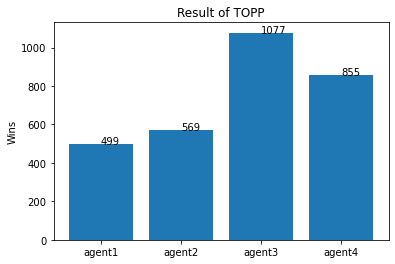

In [52]:
x = ['agent'+str(i+1) for i in range(len(agents))]
y = [result[agents[i]] for i in range(len(agents))]
plt.bar(x,y)
for index, value in enumerate(y):
    plt.text(index, value, str(value))
    
plt.ylabel('Wins')
plt.title("Result of TOPP")
plt.show()

## TOPP of pretrained models

In [5]:
agent2

In [13]:
def play(agent1, agent2, env):
    
    while env.get_winner() == 0:
        if env.current_player == 1:
            action = agent1.actor.get_action(env)
            
        else:
            action = agent2.actor.get_action(env)
        
        env.make_action(action)
        
            
        #env.display_board()
    winner = env.get_winner()
    env.reset()
    return winner

In [14]:
blue_winner = 0
red_winner = 0
for i in range(100):
    winner = play(agent1, agent2, hex)
    if winner == 1:
        blue_winner += 1
    elif winner == 2:
        red_winner += 1
print("blue winner: {}".format(blue_winner))
print("red winner: {}".format(red_winner))

blue winner: 0
red winner: 100


In [4]:
def onclick(event, board):
    global ix, iy
    ix, iy = event.xdata, event.ydata
    ix, iy = rotate_coordinate([ix,iy], -board.get_angle())
    ix, iy = round(ix), round(iy)
    action = (ix, iy)
    actions.append(action)
    board.make_action(action)
    board.display_board()
    fig.canvas.mpl_disconnect(connection)

def set_piece(board) -> List[Tuple[int, int]]:
    board = board.copy()
    global actions, connection, fig
    actions = []
    fig = plt.figure()
    connection = fig.canvas.mpl_connect('button_press_event', lambda event: onclick(event, board))
    
    board.display_board()
    
    plt.show()
    return actions

In [91]:
%matplotlib qt
action = set_piece(Hex((5,5)))


In [92]:
action

[(3, 1)]

In [19]:
%matplotlib qt
def man_vs_machine(player1, player2, env, n_simulations):
    current = player1
    if isinstance(player1, Agent):
        mcts = MCTS(player1.actor, env)
    else:
        mcts = MCTS(player2, env)
    
    while env.get_winner() == 0:
        env.display_board()
        if isinstance(current, Agent):
            distribution = mcts.search(n_simulations)
            # Choose action greedily
            action = max(distribution, key=distribution.get)
            mcts.set_new_root(action)
            
        else:
            #actions = set_piece(env)
            action = input("Enter move as int,int")
            action = action.split(',')
            action = (int(action[0]), int(action[1]))
            #action = actions[0]
            #plt.show()
            mcts.set_new_root(action)
            
        env.make_action(action)
        current = player1 if current != player1 else player2
    winner = env.get_winner()
    env.display_board()
    env.reset()
    return winner

hex = Hex((4,4))
man_vs_machine(agent1, "meg", hex, n_simulations=100)



KeyboardInterrupt: Interrupted by user

In [29]:
x = input("skirv:")

skirv:3,3


In [30]:

y = x.split(',')
(int(y[0]),int(y[1]))

(3, 3)

In [6]:
from tensorflow import keras as KER 
actor1 = Actor(learning_rate=0.01,
             epsilon=0.1,
             end_epsilon=0.1,
             nn_shape=(30,15,16),
             filters=(10,),
             kernel_sizes=((2,2),),
                nn_opt='Adam',
              nn_activation='relu',
              nn_last_activation='softmax',
              nn_loss= 'categorical_crossentropy',
              encoder=encoder
             )
actor1.model = KER.models.load_model('model1.h5')

actor2 = Actor(learning_rate=0.01,
             epsilon=0.1,
             end_epsilon=0.1,
             nn_shape=(30,15,16),
             filters=(10,),
             kernel_sizes=((2,2),),
                nn_opt='Adam',
              nn_activation='relu',
              nn_last_activation='softmax',
              nn_loss= 'categorical_crossentropy',
              encoder=encoder
             )
actor2.model = KER.models.load_model('model2.h5')


agent1 = Agent(actor1)
agent2 = Agent(actor2)

def play(agent1, agent2, env, n_simulations):
    mcts1 = MCTS(actor1, env)
    mcts2 = MCTS(actor2, env)
    
    while env.get_winner() == 0:
        if env.current_player == 1:
            distribution = mcts1.search(n_simulations)
            # Choose action greedily
            action = max(distribution, key=distribution.get)
            mcts1.set_new_root(action)
            mcts2.set_new_root(action)
            
        else:
            
            distribution = mcts2.search(n_simulations)
            
            # Choose action greedily
            action = max(distribution, key=distribution.get)
            mcts2.set_new_root(action)
            mcts1.set_new_root(action)
        
        env.make_action(action)
        
            
        #env.display_board()
    winner = env.get_winner()
    env.reset()
    return winner
    

OSError: SavedModel file does not exist at: model1.h5/{saved_model.pbtxt|saved_model.pb}

In [11]:
blue_vic = 0
vics = []
for i in range(20):
    print(i)
    vic = play(agent1, agent2, hex, 100)
    if vic == 1:
        blue_vic += 1
    vics.append(vic)
blue_vic

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


11

In [9]:
mcts = MCTS(env = hex, target_policy=agent2.actor)

In [14]:

%time mcts.search(100)

CPU times: user 4.33 s, sys: 112 ms, total: 4.44 s
Wall time: 4.23 s


{(1, 0): 0.023333333333333334,
 (0, 1): 0.060000000000000005,
 (0, 0): 0.04666666666666667,
 (3, 0): 0.16666666666666669,
 (2, 3): 0.09000000000000001,
 (0, 3): 0.006666666666666667,
 (2, 2): 0.006666666666666667,
 (2, 0): 0.07666666666666667,
 (3, 2): 0.08,
 (1, 3): 0.006666666666666667,
 (3, 3): 0.006666666666666667,
 (0, 2): 0.043333333333333335,
 (1, 1): 0.023333333333333334,
 (2, 1): 0.3066666666666667,
 (3, 1): 0.04,
 (1, 2): 0.016666666666666666}

In [58]:
data = np.asarray(Image.open(path))

In [59]:
data.shape

(575, 1024, 3)

In [12]:
import cProfile


In [4]:
encoder = HexEncoder(padding=2)

In [5]:
h = Hex((4,4))

In [6]:
actor = Actor(learning_rate=0.001,
             epsilon=0.25,
             end_epsilon=0.05,
             nn_shape=(64, 16),
             filters=(56,56),
             kernel_sizes=((3,3),(1,1)),
                nn_opt='Adam',
              nn_activation='relu',
              nn_last_activation='softmax',
              nn_loss= 'categorical_crossentropy',
              encoder=encoder
             )
agent = Agent(actor=actor)

In [7]:
encoder.encode(h).shape

TensorShape([1, 8, 8, 9])

In [8]:
mcts = MCTS(agent.actor, h)

In [9]:
%time mcts.search(100)

CPU times: user 4.67 s, sys: 73.8 ms, total: 4.75 s
Wall time: 4.96 s


{(2, 2): 0.08,
 (0, 0): 0.01,
 (1, 2): 0.03,
 (3, 1): 0.01,
 (1, 3): 0.1,
 (1, 0): 0.01,
 (3, 0): 0.25,
 (0, 3): 0.01,
 (3, 2): 0.01,
 (2, 0): 0.08,
 (3, 3): 0.01,
 (2, 1): 0.34,
 (0, 2): 0.01,
 (0, 1): 0.03,
 (2, 3): 0.01,
 (1, 1): 0.01}

In [13]:
cProfile.run('mcts.search(100)', sort='cumtime')

         8150594 function calls (8140946 primitive calls) in 10.730 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   10.774   10.774 {built-in method builtins.exec}
        1    0.000    0.000   10.774   10.774 <string>:1(<module>)
        1    0.000    0.000   10.774   10.774 monte_carlo_ts.py:160(search)
      100    0.001    0.000   10.774    0.108 monte_carlo_ts.py:152(perform_simulation)
      100    0.022    0.000   10.697    0.107 monte_carlo_ts.py:78(_rollout)
     1072    0.051    0.000   10.453    0.010 actor.py:59(get_action)
     1072    0.074    0.000    6.187    0.006 encoder.py:216(encode)
6432/1072    0.300    0.000    4.089    0.004 base_layer.py:901(__call__)
     4288    1.431    0.000    3.692    0.001 encoder.py:105(bridge_encoding)
     1072    0.013    0.000    3.571    0.003 sequential.py:354(call)
     1072    0.009    0.000    3.401    0.003 functional.py:406(call)
  

In [14]:
cProfile.run('actor.get_action(h)', sort='cumtime')

         6872 function calls (6863 primitive calls) in 0.008 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.008    0.008 {built-in method builtins.exec}
        1    0.000    0.000    0.008    0.008 <string>:1(<module>)
        1    0.000    0.000    0.008    0.008 actor.py:59(get_action)
      6/1    0.000    0.000    0.004    0.004 base_layer.py:901(__call__)
        1    0.000    0.000    0.004    0.004 sequential.py:354(call)
        1    0.000    0.000    0.004    0.004 functional.py:406(call)
        1    0.000    0.000    0.004    0.004 functional.py:516(_run_internal_graph)
        1    0.000    0.000    0.004    0.004 encoder.py:216(encode)
        4    0.001    0.000    0.002    0.000 encoder.py:105(bridge_encoding)
    17/13    0.000    0.000    0.002    0.000 dispatch.py:198(wrapper)
       14    0.001    0.000    0.001    0.000 {built-in method tensorflow.python._pywrap_tfe.T

In [15]:
cProfile.run('encoder.encode(h)', sort='cumtime')

         5413 function calls in 0.004 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.004    0.004 {built-in method builtins.exec}
        1    0.000    0.000    0.004    0.004 <string>:1(<module>)
        1    0.000    0.000    0.004    0.004 encoder.py:216(encode)
        4    0.001    0.000    0.002    0.001 encoder.py:105(bridge_encoding)
        1    0.000    0.000    0.001    0.001 encoder.py:17(create_padded_env)
        1    0.000    0.000    0.001    0.001 hex.py:54(__init__)
        1    0.000    0.000    0.001    0.001 hexagonal_grid.py:98(__init__)
        1    0.000    0.000    0.001    0.001 hexagonal_grid.py:48(generate_neighbours)
     1424    0.001    0.000    0.001    0.000 hexagonal_grid.py:62(get_cell)
       44    0.000    0.000    0.000    0.000 encoder.py:158(_process_save_endpoint)
       44    0.000    0.000    0.000    0.000 encoder.py:50(get_carrier_points)
     

In [21]:
actor = Actor(learning_rate=0.001,
             epsilon=0.25,
             end_epsilon=0.05,
             nn_shape=(155,128,25),
             filters=(128, 128, 64),
             kernel_sizes=((5,5),(3,3),(1,1)),
                nn_opt='Adam',
              nn_activation='relu',
              nn_last_activation='softmax',
              nn_loss= 'categorical_crossentropy',
              encoder=encoder
             )

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.